<a href="https://colab.research.google.com/github/EugeneLogvinovsky/ITHillel/blob/main/%D0%9C%D1%83%D0%BB%D1%8C%D1%82%D0%B8%D0%BA%D0%BB%D0%B0%D1%81%D0%BE%D0%B2%D0%B0_%D0%BB%D0%BE%D0%B3%D1%96%D1%81%D1%82%D0%B8%D1%87%D0%BD%D0%B0_%D1%80%D0%B5%D0%B3%D1%80%D0%B5%D1%81%D1%96%D1%8F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (5, 3) # (w, h)
plt.rcParams["figure.dpi"] = 200
np.random.seed(42)

In [2]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

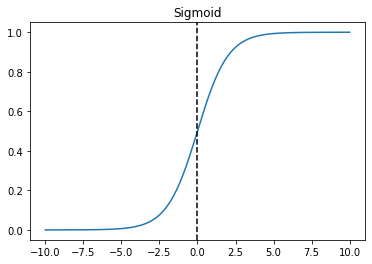

In [3]:
x = np.linspace(-10, 10, 200)
plt.plot(x, sigmoid(x))
plt.axvline(x=0, color='k', linestyle='--');
plt.title("Sigmoid");

In [88]:

def cost(theta, x, y):
    h = sigmoid(x @ theta)
    m = len(y)
    cost = 1 / m * np.sum(
        -y * np.log(h) - (1 - y) * np.log(1 - h)
    )
    grad = 1 / m * ((y - h) @ x.T)
    return cost, grad

In [90]:
def fit(x, y, max_iter=5000, alpha=0.1):
    #x = np.insert(x, 0, 1, axis=0)
    
    thetas = []
    classes = np.unique(y)
    costs = np.zeros(max_iter)

    for c in classes:
        #Один против всех
        binary_y = np.where(y == c, 1, 0)
        
        theta = np.zeros(x.shape)
        for epoch in range(max_iter):
            costs[epoch], grad = cost(theta, x, binary_y)
            theta += alpha * grad
            
        thetas.append(theta)
    return thetas, classes, costs

In [92]:
def predict(classes, thetas, x):
    #x = np.insert(x, 0, 1, axis=0)
    preds = [np.argmax(
        [sigmoid(xi @ theta) for theta in thetas]
    ) for xi in x]
    return [classes[p] for p in preds]

In [7]:
!pip install torch torchvision

In [43]:
from torchvision import datasets
dataset = datasets.MNIST('../data', train = True, download = True)
lr = 0.1
X = dataset.train_data
y = dataset.train_labels
#X = X[y <= 1]
#y = y[y <= 1]
data = np.array(y)
np.random.shuffle(data)
num_train = int(.8 * len(data))  # 80/20 train/test split
x_train, y_train = data[:num_train], data[:num_train]
x_test, y_test = data[num_train:-1], data[num_train: -1]

print(x_test, y_test)


[8 9 2 ... 9 5 8] [8 9 2 ... 9 5 8]
[0 1 2 3 4 5 6 7 8 9]


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:58: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")
/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:48: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
def score(classes, theta, x, y):
    return (predict(classes, theta, x) == y).mean()
thetas, classes, costs = fit(x_train, y_train)
print(f"Train Accuracy: {score(classes, thetas, x_train[:2:], y_train):.3f}")
print(f"Test Accuracy: {score(classes, thetas, x_test[:2:], y_test):.3f}")